Found 3511 files belonging to 5 classes.


2025-08-15 11:33:39.461257: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
I0000 00:00:1755272020.731174    9945 service.cc:152] XLA service 0x73ae3c003020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755272020.731192    9945 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-08-15 11:33:40.808377: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1755272021.308391    9945 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-08-15 11:33:41.980787: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1679', 132 bytes spill stores, 132 bytes spill loads

2025-08-15 11:33:42.032613:

  5/439 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step

I0000 00:00:1755272024.972799    9945 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


437/439 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

2025-08-15 11:34:00.613943: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1679', 132 bytes spill stores, 132 bytes spill loads

2025-08-15 11:34:00.811657: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1679', 4 bytes spill stores, 4 bytes spill loads

2025-08-15 11:34:01.237907: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1679', 1416 bytes spill stores, 1416 bytes spill loads



439/439 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step
Accuracy : 0.0248
Precision: 0.0006
Recall   : 0.0248
F1-score : 0.0012

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2581
           1       0.00      0.00      0.00       244
           2       0.00      0.00      0.00       529
           3       0.02      1.00      0.05        87
           4       0.00      0.00      0.00        70

    accuracy                           0.02      3511
   macro avg       0.00      0.20      0.01      3511
weighted avg       0.00      0.02      0.00      3511



/home/duc/Documents/DoAn/myvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/duc/Documents/DoAn/myvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/duc/Documents/DoAn/myvenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

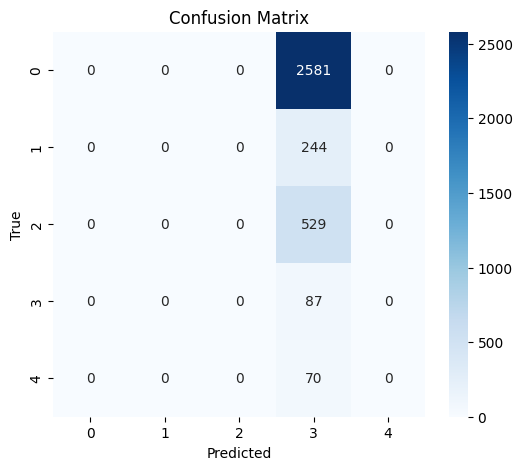

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ====== CONFIG ======
TEST_DIR = "eyepacs_2015/test_preprocess_ben_graham"
IMG_SIZE = 224  #448
BATCH_SIZE = 8
CLASS_NAMES = ["0", "1", "2", "3", "4"]

# ====== Load model ======
model_path = "mode_resnet50.keras"  # đổi thành checkpoint cuối cùng của bạn
model = tf.keras.models.load_model(model_path, compile=False)

# ====== Tạo test dataset ======
test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    labels="inferred",
    label_mode="int",
    class_names=CLASS_NAMES,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=False
)

# Chỉ scale ảnh, không encode ordinal vì ta đánh giá trực tiếp
from tensorflow.keras.applications.efficientnet import preprocess_input
def preprocess(image, label):
    image = tf.cast(image, tf.float32)
    image = preprocess_input(image)
    return image, label

test_ds = test_ds.map(preprocess)

# ====== Dự đoán ======
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_pred_prob = model.predict(test_ds, verbose=1)

# Nếu model là output ordinal (4 giá trị sigmoid) => chuyển thành nhãn 0–4

    # Convert ordinal probs -> class index
y_pred_bin = (y_pred_prob >= 0.5).astype(int)
y_pred = y_pred_bin.sum(axis=1)


# ====== Tính các metrics ======
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average="weighted")
rec = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

# ====== Confusion Matrix ======
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
